In [36]:
import numpy as np
from scipy import constants
import tabulate
import pandas as pd
import matplotlib.pyplot as plt
# importing Vikrams functions
#import sys
#sys.path.insert(0,"/Users/ritika/SQRL_Rithi_python/XTalkRobustMS/tools")
from IonChainTools import calcPositions,lengthScale
from tweezer_functions import *

In [37]:
#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

In [38]:
NA = 0.6
wx = 2*pi*1e6
d = 5e-6
tweezer_wavelength = 532*1e9
U = 20e-3
beam_waist = 0.41*tweezer_wavelength / NA

In [39]:
omega_range_twee_r = np.linspace(0.107*2*pi*1e6 , 1.5*2*pi*1e6,2)
omega_range_twee_a = np.linspace(0.035*2*pi*1e6 , 0.158 * 2*pi*1e6 , 2)

In [42]:
omega_axial(U,beam_waist,tweezer_wavelength,m)
omega_radial(U,beam_waist,m)

3.0202948221394186

In [13]:
mode_vectors_per_strength =[]
for tweezer_strength in omega_range_twee_r:
    mode_vectors = []
    for omega_tw in omega_range_twee_r:
        omega_tw_x = np.full(N, omega_tw) * tweezer_strength
        omega_combined_x = np.sqrt(omega_tw_x**2 + omega_rf_x**2)  # Assuming omega_rf_x is defined
        modes = mode_calc_r(m, omega_combined_x, omega_a)  # Assuming m and omega_a are defined
        mode_vectors.append(modes)
    mode_vectors_per_strength.append(mode_vectors)

# Convert the list of mode vectors per strength into a numpy array
#mode_matrix_per_strength = np.array(mode_vectors_per_strength)

In [14]:
mode_vectors_per_strength[0]

[[(71936188588.84969, array([0.70710678, 0.70710678])),
  (71936188588.0774, array([-0.70710678,  0.70710678]))],
 [(1008451241802.8193, array([0.70710678, 0.70710678])),
  (1008451241802.7643, array([-0.70710678,  0.70710678]))]]

In [22]:
N = 12
tweezed_ions = [0,1,2,9,10,11]


tweezer_strength_r = 1.5*2*pi*1e6
tweezer_strength_a = 0.158 * 2*pi*1e6

omega_tweezer_r = np.zeros(N)
omega_tweezer_a = np.zeros(N)
omega_tweezer_r[tweezed_ions] = tweezer_strength_r
omega_tweezer_a[tweezed_ions] = tweezer_strength_a

#print(omega_tweezer_r)
#print(omega_tweezer_a)

omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)


omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
omega_combined_ra = np.sqrt(omega_rf_r**2 + omega_tweezer_a)
omega_combined_ar = np.sqrt(omega_a**2 + omega_tweezer_r**2)
#print(omega_combined_r)

In [25]:
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)
ra_modes = mode_calc_r(m,omega_combined_ra,omega_a)
ar_modes = mode_calc_a(m,omega_combined_ar)
base_r = mode_calc_r(m,omega_rf_r,omega_a)
base_a = mode_calc_a(m,omega_a)

[9130382.89354038 9129594.66269438 6381271.06814709 6378211.66902882
              nan              nan 3646881.57135975 3624726.31052886
 1391437.69892027 1181602.73497288  311658.34815999  318208.12741481]
[960214.10717134 892651.21643036 824159.20713446 754617.01116941
 683872.56850399 611730.19519384 125000.         216506.35085008
 302255.88714359 383796.58624992 537930.5892805  462118.99405032]


In [27]:
ar_modes

[(311658.3481599899,
  array([-0.0111477 , -0.00784402, -0.00767338, -0.70686051,  0.00579219,
         -0.00836589, -0.00836589,  0.00579219, -0.70686051, -0.00767338,
         -0.00784402, -0.0111477 ])),
 (318208.1274148062,
  array([ 0.00476007,  0.00128017,  0.00084106,  0.70699066, -0.0117355 ,
          0.00121931, -0.00121931,  0.0117355 , -0.70699066, -0.00084106,
         -0.00128017, -0.00476007])),
 (1181602.7349728756,
  array([-0.32119341, -0.31655178, -0.32247165,  0.01370178, -0.28439196,
         -0.33402884, -0.33402884, -0.28439196,  0.01370178, -0.32247165,
         -0.31655178, -0.32119341])),
 (1391437.698920269,
  array([-0.33432308, -0.3179841 , -0.31707142, -0.00096294, -0.28477249,
         -0.32478239,  0.32478239,  0.28477249,  0.00096294,  0.31707142,
          0.3179841 ,  0.33432308])),
 (3624726.3105288586,
  array([-0.5152884 ,  0.03343695,  0.26862799, -0.00088514, -0.18088748,
          0.35843796,  0.35843796, -0.18088748, -0.00088514,  0.26862799,
 

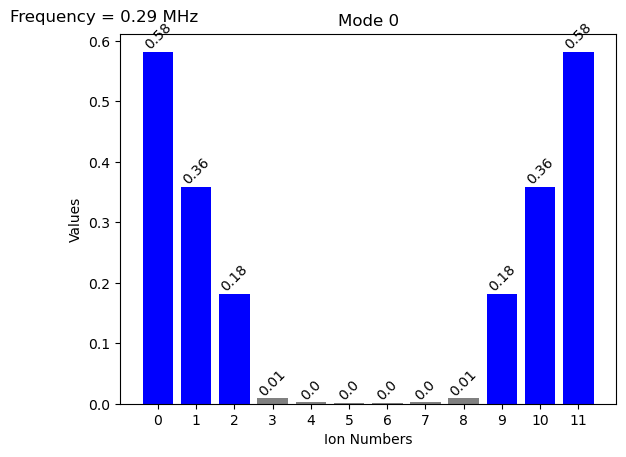

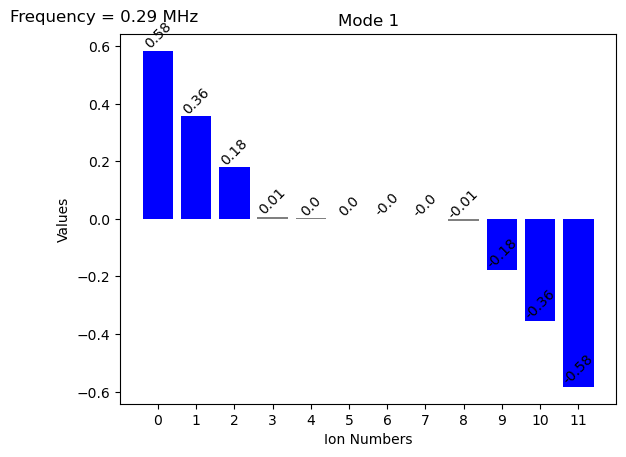

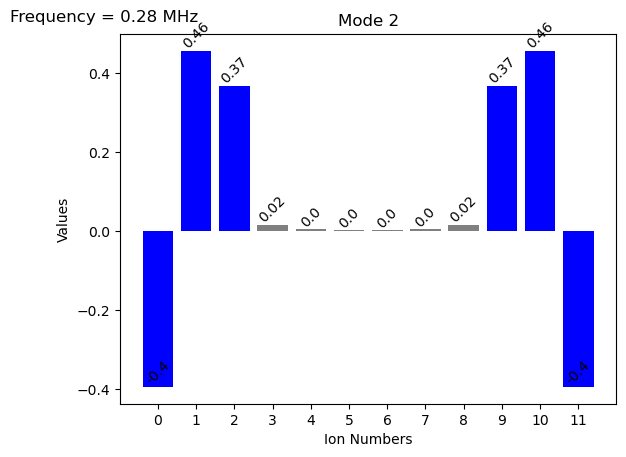

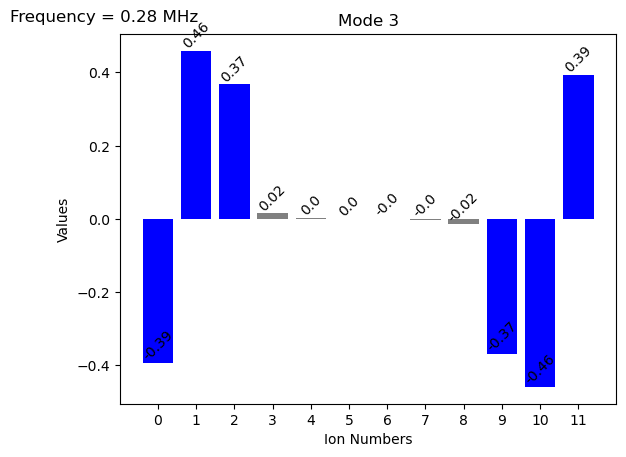

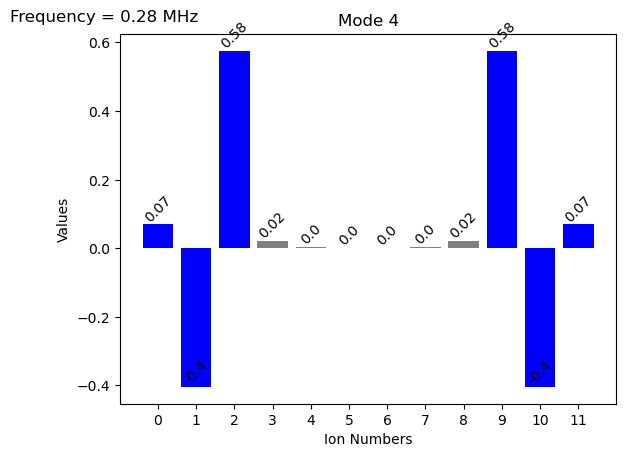

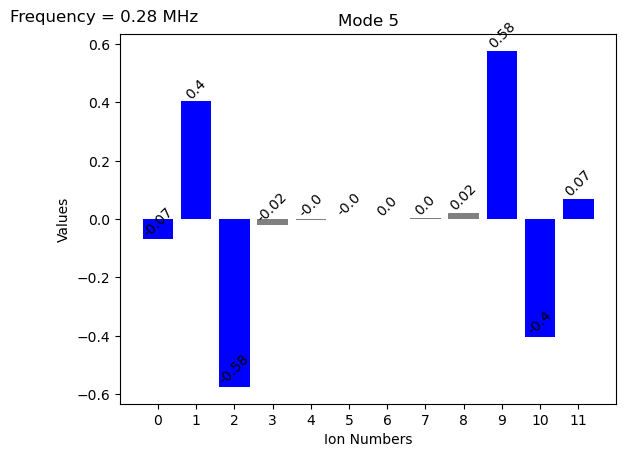

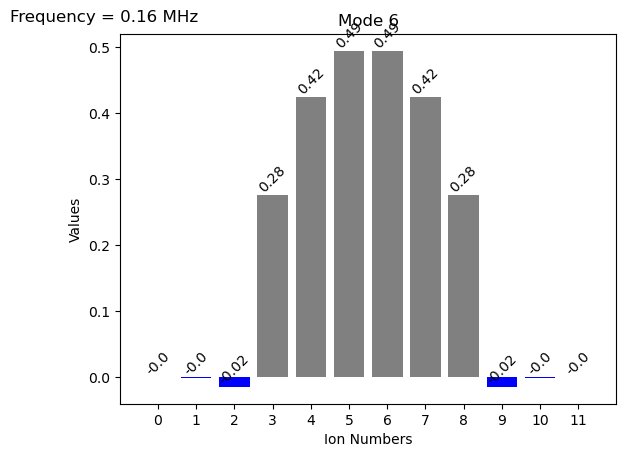

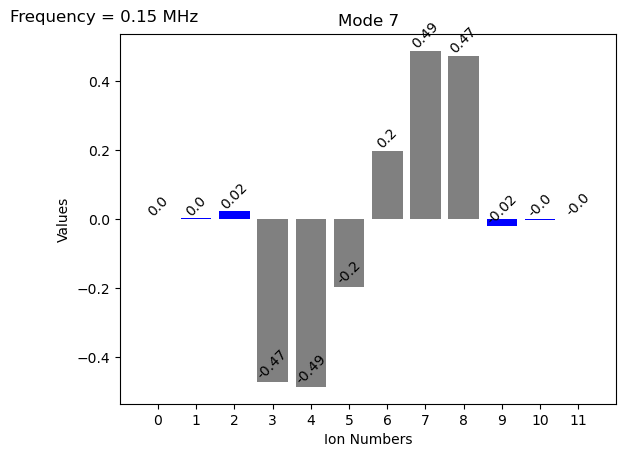

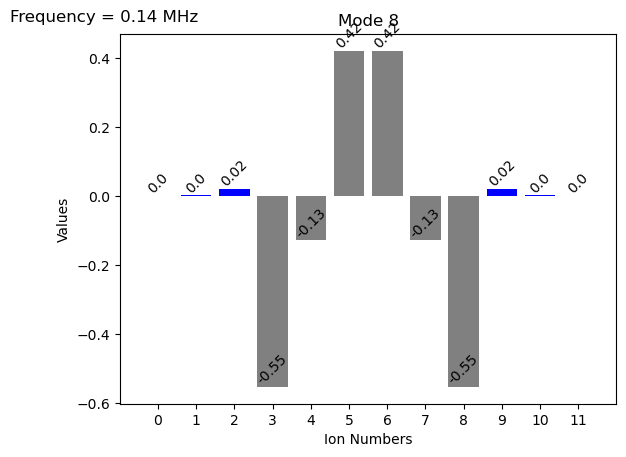

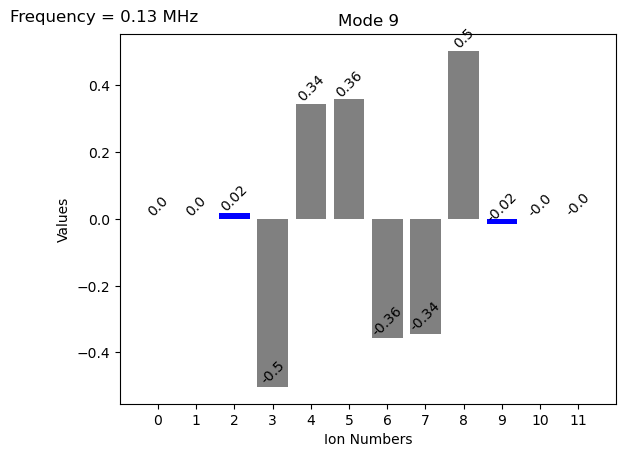

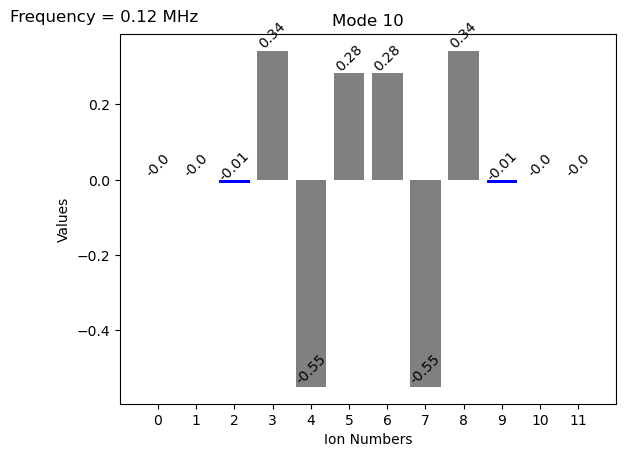

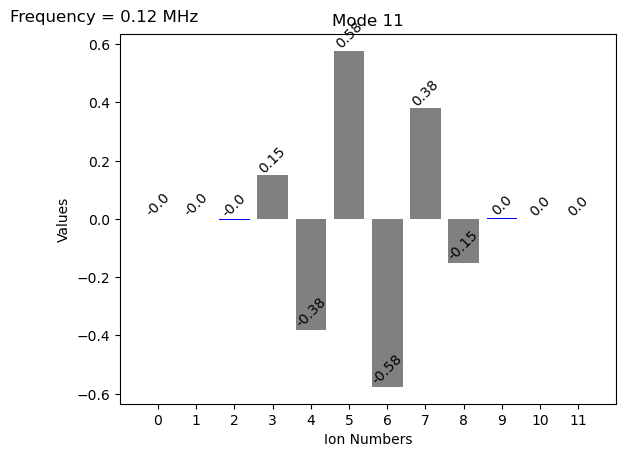

In [44]:
tweezer_strength_r = 3*2*pi*1e6
omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)
omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)

for i in range(len(rr_modes)):
    ion_numbers = np.arange(0, N)
    colors = ['blue' if x in tweezed_ions else 'gray' for x in ion_numbers]
     # Convert frequency to MHz
    frequency_mhz = rr_modes[i][0] / (2 * np.pi * 1e6)
    
    plt.bar(ion_numbers, rr_modes[i][1],color = colors)
    for index, value in enumerate(rr_modes[i][1]):
        plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', rotation=45)
    
    plt.figtext(0.1, 0.9, f'Frequency = {frequency_mhz:.2f} MHz', fontsize=12, ha='center', va='bottom')
    plt.xticks(ion_numbers)
    plt.title(f'Mode {i}')
    plt.xlabel('Ion Numbers')
    plt.ylabel('Values')
    plt.show()

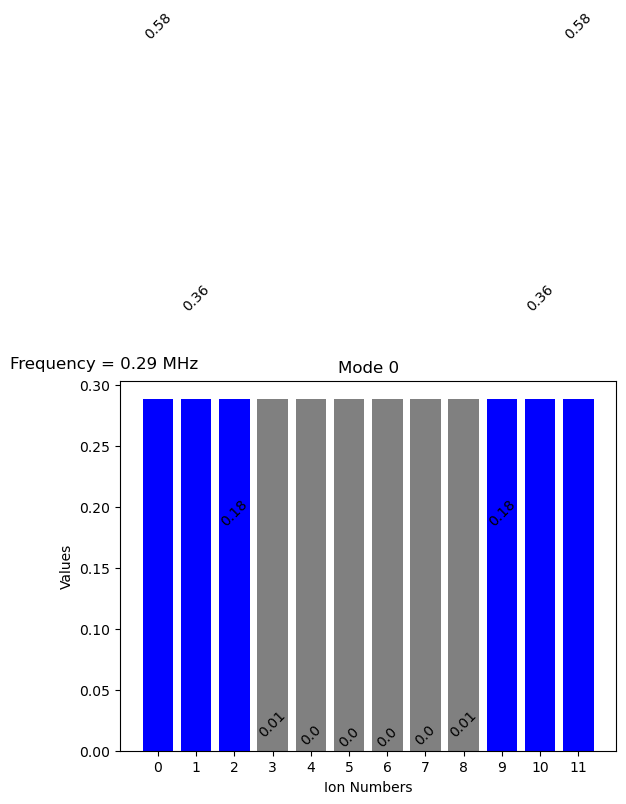

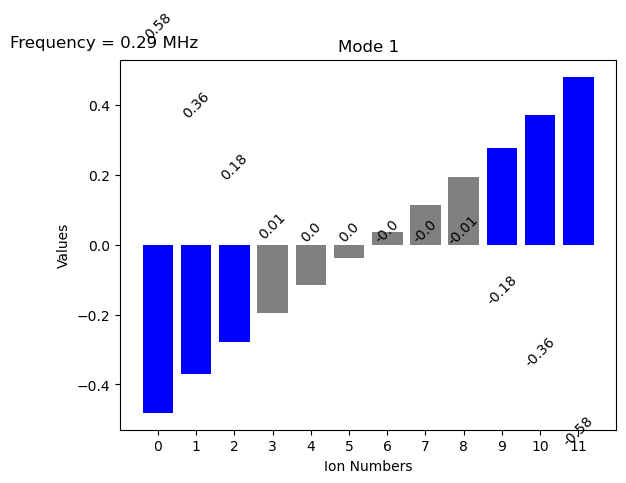

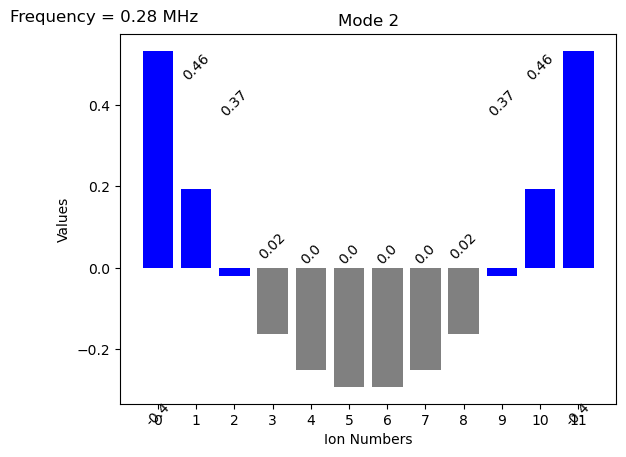

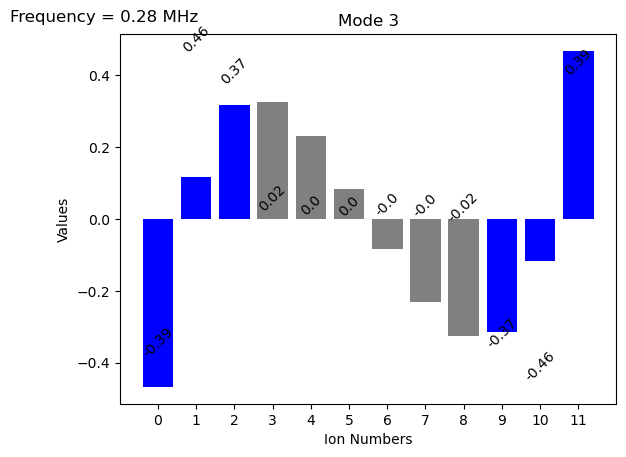

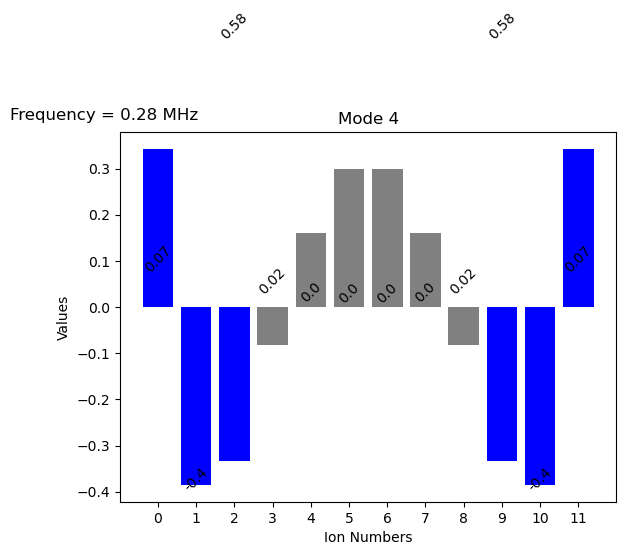

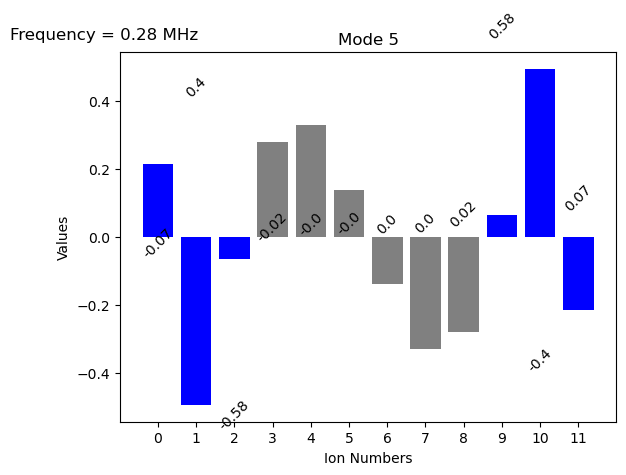

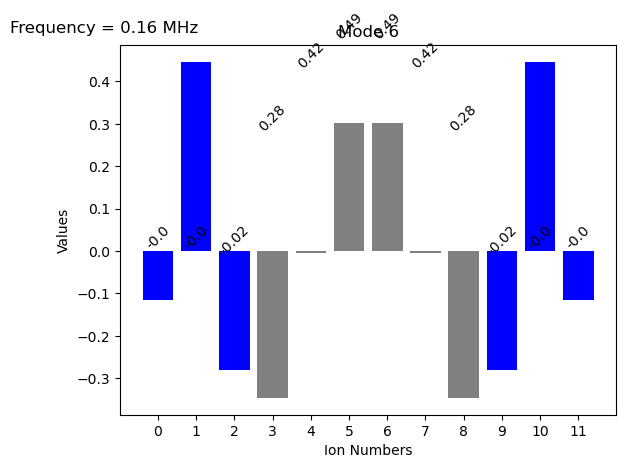

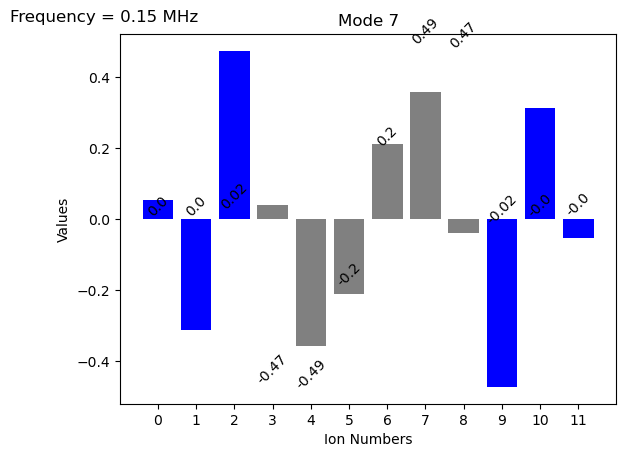

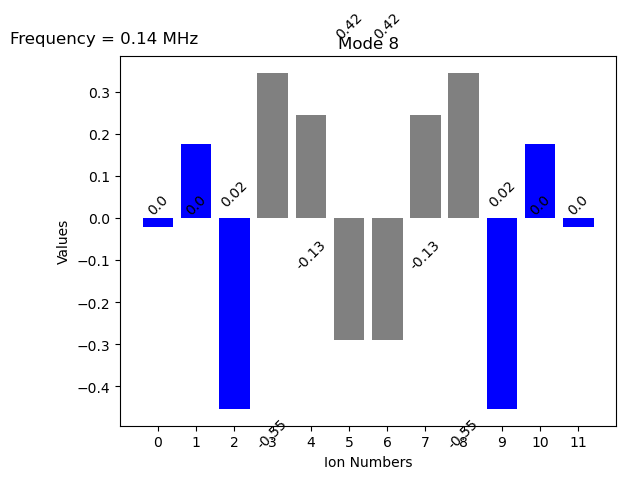

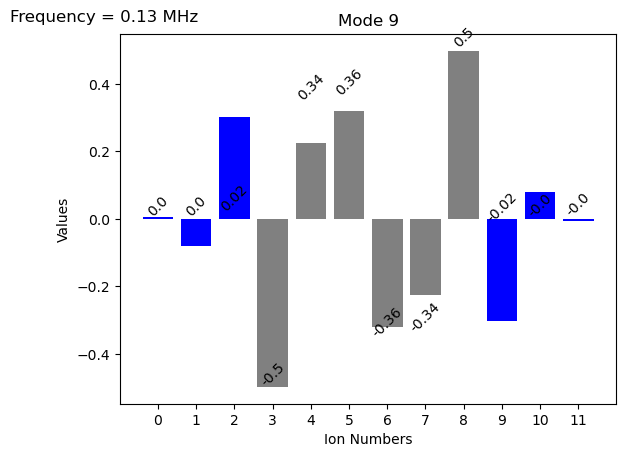

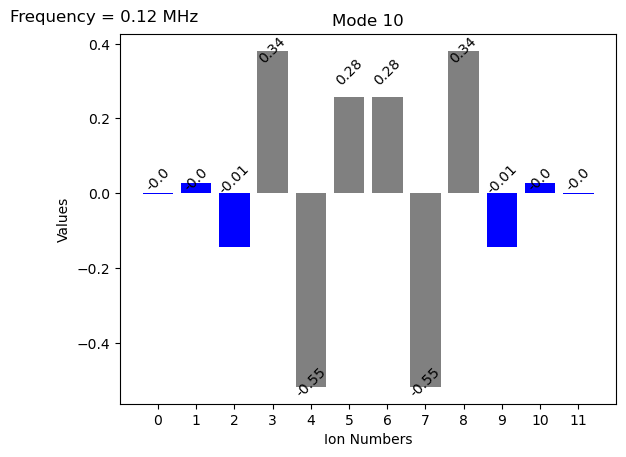

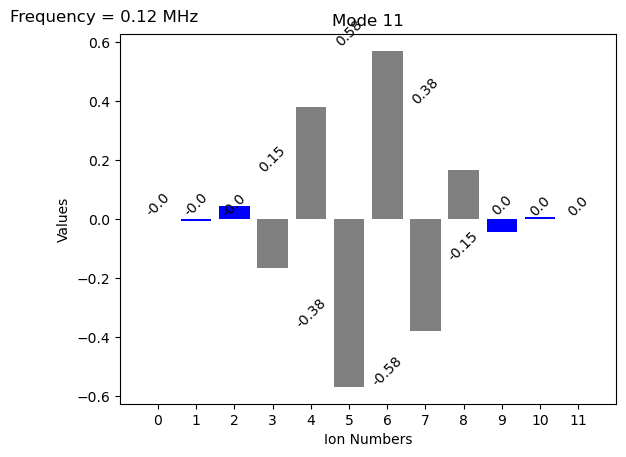

In [43]:
tweezer_strength_r = 3*2*pi*1e6
omega_rf_r = 1.0 * pi * 1e6 *2
omega_a = omega_rf_r /8
omega_rf_r = omega_rf_r * np.ones(N) 
omega_a = omega_a * np.ones(N)
omega_combined_rr = np.sqrt(omega_rf_r**2 + omega_tweezer_r**2)
rr_modes = mode_calc_r(m,omega_combined_rr,omega_a)
base_modes = mode_calc_r(m,omega_rf_r,omega_a)

for i in range(len(rr_modes)):
    ion_numbers = np.arange(0, N)
    colors = ['blue' if x in tweezed_ions else 'gray' for x in ion_numbers]
     # Convert frequency to MHz
    frequency_mhz = rr_modes[i][0] / (2 * np.pi * 1e6)
    
    plt.bar(ion_numbers, base_modes[i][1],color = colors)
    for index, value in enumerate(rr_modes[i][1]):
        plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', rotation=45)
    
    plt.figtext(0.1, 0.9, f'Frequency = {frequency_mhz:.2f} MHz', fontsize=12, ha='center', va='bottom')
    plt.xticks(ion_numbers)
    plt.title(f'Mode {i}')
    plt.xlabel('Ion Numbers')
    plt.ylabel('Values')
    plt.show()

In [29]:
.6*11


6.6